In [1]:
#Load Packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy import linalg
from sklearn import tree
from sklearn import metrics
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from IPython.display import display, clear_output

#Set plots to inline
%matplotlib inline

#Define plot colors and options
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
labels=['sr','og','^b']
colors=['r','g','b']

#Function for Plotting the clustering
def plot_clusters(labels, clusters, X,i, inertia,showcenter=True):
  plt.figure(1)
  clear_output(wait=True)
  unique_labels = set(labels)
  colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
  for k, col in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=5, alpha=0.5)
    if(showcenter):
        plt.plot(clusters[k,0],clusters[k,1],'o',markerfacecolor=col,
             markeredgecolor='k', markersize=20,alpha=1)
  plt.title('Iteration: %d, Total Variation %.2f'%(i,inertia))  




Regression
-------

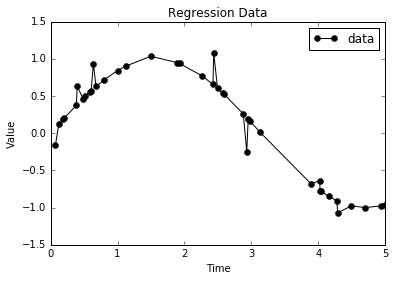

In [4]:
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

#Define evaluation points
Xtest = np.arange(0,5,0.01)
Xtest = Xtest[:,np.newaxis]

#Plot the results
plt.plot(X, y, 'ko-', label='data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Regression Data')
plt.legend();

In [5]:
# Fit regression models
svr_lin = SVR(kernel='linear', C=10)
y_lin = svr_lin.fit(X, y).predict(Xtest)

svr_rbf = SVR(kernel='rbf', C=10, gamma=1)
y_rbf = svr_rbf.fit(X, y).predict(Xtest)

svr_poly = SVR(kernel='poly', C=10, degree=3)
y_poly = svr_poly.fit(X, y).predict(Xtest)

#Plot the results
plt.figure(1)
plt.scatter(X, y, c='k', label='data')
plt.plot(Xtest, y_lin, c='r', label='SVR-Linear')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Linear SVR')
plt.legend(loc=3);

plt.figure(2)
plt.scatter(X, y, c='k', label='data')
plt.plot(Xtest, y_rbf, c='g', label='SVR-RBF')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('RBF SVR')

plt.figure(3)
plt.scatter(X, y, c='k', label='data')
plt.plot(Xtest, y_poly, c='b', label='SVR-Poly')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Ploynomial SVR')


NameError: name 'SVR' is not defined

Clustering with KMeans
---

/Users/adams/py2/lib/python2.7/site-packages/matplotlib/lines.py:1106: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self._markerfacecolor != fc:


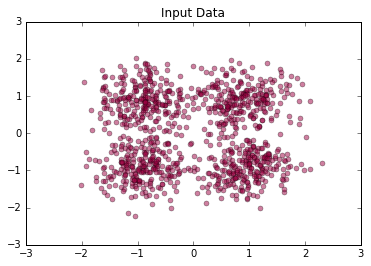

In [6]:
#Set data spread
std=0.5

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1],[-1,1]]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=std,random_state=0)
X = StandardScaler().fit_transform(X)
labels = labels_true;
labels = 0*labels
plot_clusters(labels, 0*np.array(centers)[[0],:], X,0, 0, False)
plt.title("Input Data")
plt.draw()
plt.show()

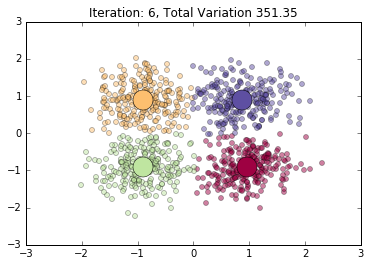

In [73]:
#Set Number of Clusters
n_clusters=4

# Run KMeans
centers = np.random.randn(n_clusters, 2)/10.0
old_inertia = np.inf
for i in range(100):
  km = KMeans(n_clusters=n_clusters, n_init=1,init=centers,max_iter=1).fit(X)
  labels = km.labels_
  centers = km.cluster_centers_
  inertia = km.inertia_
  plot_clusters(labels, centers, X,i, inertia)
  plt.draw()
  plt.show()
  if(abs(old_inertia - inertia)/inertia < 1e-6):
    break
  else:
    old_inertia = inertia